<a href="https://www.nvidia.com/dli"> <img src="images/DLI Header.png" alt="标题" style="width: 400px;"/> </a>

# 基于 Numba 的 CUDA Python 编程简介

**[CUDA](https://en.wikipedia.org/wiki/CUDA)** 计算平台可以让开发者在 NVIDIA GPU 上实现大规模并行计算，从而加速应用程序的执行，节省宝贵的时间资源。

**[Numba](http://numba.pydata.org/)** 是一款即时(JIT) Python 函数编译器，提供简洁的 API 用于加速 Python 函数运行。对希望使用 GPU 加速其应用又不想写 C/C++ 代码的同学而言，Numba 是个极具吸引力的选择，而对日常使用 NumPy 执行大量计算任务的开发者来说，Numba 更是不二之选。Numba 可用于加速 CPU 上运行的 Python 函数，同样也适用于在 NVIDIA GPU 进行应用加速。**本课程侧重讲解使用 Numba 在 GPU 上加速 Python 应用程序所需的基础技能。**

## 课程结构

本课程分为以下**三大**版块：

- _基于 Numba 的 CUDA Python 编程简介_
- _使用 Numba 在 Python 中编写自定义 CUDA 核函数_
- _使用 Numba 实现 CUDA Python 的多维网格和共享内存_

每节均包含一项最终评估，成功完成该评估后，我们将为您授予该课程的能力证书。每节另包含高阶资料附录，感兴趣者可借此深入学习。

### 基于 Numba 的 CUDA Python 编程简介

第一节中，您将首先学习如何使用 Numba 编译 CPU 函数，并了解 Numba 编译器的运作方式。然后，您将继续学习如何使用 GPU 加速具体函数，还将学习在 CPU 和 GPU 间高效传输数据的技巧。

第一节学习结束后，您将能使用 GPU 加速对 NumPy 数组执行元素级运算的 Python 代码。

### 使用 Numba 在 Python 中编写自定义 CUDA 核函数

第二节中，您将进一步拓展能力，通过编写自定义 CUDA 核函数，以在 GPU 上并行执行任意计算密集型函数。为达成学习目标，您还需了解 NVIDIA GPU 如何并行执行代码，并学习几个基础的并行编程技巧，包括如何协调线程工作以及处理竟态条件(racing condition)。您还会学习在 GPU 上调试代码的技巧。

第二节学习结束后，您将能使用 GPU 加速各类处理一维数据的计算密集型函数。

### 基于 Numba 控制 CUDA 的多维网格和共享内存

第三节中，您将开始并行处理二维数据，并将学习如何使用 GPU 上名为共享内存的片上存储空间。

第三节学习结束后，您将能使用 Numba 对一维和二维数据编写经 GPU 加速的 Python 代码。同时，您还可使用几种最为重要的优化策略，以编写稳定而快速的 GPU 程序。

## 课程预备知识

* 能够编写 Python，尤其是善于编写和调用函数，处理变量、循环、控制逻辑，导入和使用工具包。
* 熟悉 Python 的 NumPy。如果您从未用过 NumPy，但熟悉 Python，那么您亦可在本课中学习 NumPy 的用法。对于需要阐明的知识点，我们会提供注释和链接。
* 大致了解某些计算机科学术语，如内存分配、值类型、延迟和处理核心。
* 基本理解向量、矩阵和矩阵乘法的概念。

## 本节目标

完成本节内容的学习后，您将能够：

- 使用 Numba 为 CPU 编译 Python 函数。
- 了解 Numba 如何编译 Python 函数。
- 使用 GPU 加速 NumPy 通用函数 (ufunc)。
- 使用 GPU 加速自定义的数组处理函数。
- 优化 CPU 主机和 GPU 设备之间的数据传输。

## 什么是 Numba？

Numba 是一个**支持类型特化**的**即时** **函数编译器**，用于为 CPU 或 GPU 加速**以数字计算为主的** Python函数。此定义很长，下面就让我们逐一解析这些术语：

* **函数编译器**：Numba 用于编译 Python 函数，而非整个应用程序，亦不定义函数。Numba 不会取代 Python 解释器，而仅作为另一个 Python 模块，将普通函数转化为执行速度更快的函数（通常情况下）。
* **类型特化**：Numba 可为您当前使用的特定数据类型生成专门的执行代码，从而加速函数运行。Python 函数专为处理通用数据类型而设计，这为其带来了极大的灵活性，但也严重拖慢了运行速度。实际上，您只需调用具有少量参数类型的函数，即可让 Numba 为每个类型组生成快速执行代码。
* **即时**：Numba 在函数首次被调用时即会开始编译函数。确保编译器了解您将使用的参数类型。此特性还支持在 Jupyter Notebook 中以交互方式使用 Numba，正如使用传统应用程序一样简单。
* **以数字计算为主**：Numba 目前以处理基本数据类型为主，如 `int`、`float` 和 `complex`。字符串处理支持极为受限，且许多字符串处理函数还无法在 GPU 上获得有效加速。若要借助 Numba 获得最佳加速效果，您可能需要搭配使用 NumPy 数组。

## Numba 使用要求

Numba 支持各类操作系统：

* Windows 7 及以上版本，32 和 64 位
* macOS 10.9 及以上版本，64 位
* Linux（RHEL 5 及以上的大多数版本），32 和 64 位

Numba 还支持多种 Python 版本：

* Python 2.7、3.4 至 3.6 版本
* NumPy 1.10 及以上版本

此外，其还支持各类硬件：

* x86、x86_64 及 AMD64 CPU
* NVIDIA CUDA GPU（计算能力 3.0 及更高级别，CUDA 8.0 及以上版本）
* AMD GPU（实验性补丁）
* ARM（实验性补丁）

本课程将使用 Linux 64 位和 CUDA 9 版本。

## 注解：CUDA C/C++、Numba 与 PyCUDA 对比

Numba 绝非 CUDA 编程的唯一手段。目前，最常见的 CUDA 编程方法便是使用 CUDA C/C++ 语言扩展程序。对于 Python 而言，[PyCUDA](https://documen.tician.de/pycuda/) 是除 Numba 以外可实现 GPU 加速 Python 代码的另一种选择。本课程将着重介绍 Numba。不过作为背景知识，我们也有必要在开讲前简单对比一下刚刚提到的三个选项。

**CUDA C/C++**：
- 最常用、高效且最灵活的方式来使用 CUDA
- 加速 C/C++ 应用程序

**PyCUDA**：
- 完全对接 CUDA C/C++ API
- 在 Python 中释放 NVIDIA GPU 性能的优先选项
- 需在编写 C 代码，通常还要修改 Python 代码

**Numba**：
- 性能或许低于 PyCUDA
- （当前）并未完全支持 CUDA C/C++ API
- 仍能大幅加速应用程序，代码修改量小
- 开发者可在 Python 框架下轻松编写代码
- 能同时为 CPU 优化 Python 代码

## 第一步：编译CPU函数

之前的课程中介绍过，Numba 可用于为 CPU 或 GPU 优化代码。在介绍 GPU 加速之前，我们首先编写第一个函数，然后为 **CPU** 编译该函数。如此一来，我们在学习 Numba 语法时便会更容易，而且稍后还可让我们有机会比较 CPU 优化的 Numba 代码与 GPU 加速的 Numba 代码的性能表现。

通常，在对 Python 函数应用 [**函数装饰器**](https://en.wikipedia.org/wiki/Python_syntax_and_semantics#Decorators) 后，便可启用 Numba 编译器。装饰器即为函数修改器，使用十分简单的语法来转换所装饰的 Python 函数。我们将在此使用 Numba 的 CPU 编译装饰器 `@jit`：

In [1]:
from numba import jit
import math

# This is the function decorator syntax and is equivalent to `hypot = jit(hypot)`.
# The Numba compiler is just a function you can call whenever you want!
@jit
def hypot(x, y):
    # Implementation from https://en.wikipedia.org/wiki/Hypot
    x = abs(x);
    y = abs(y);
    t = min(x, y);
    x = max(x, y);
    t = t / x;
    return x * math.sqrt(1+t*t)

让我们尝试执行上面定义的求直角三角形斜边的运算：

In [2]:
hypot(3.0, 4.0)

5.0

下面我们将详细介绍调用 `hypot` 将会发生的具体过程，首先您要明确一点：初次调用 `hypot` 将会触发编译器，促使其编译函数代码。Numba 还会将函数的原始 Python 实现保存在 `.py_func` 属性中，以便我们能够调用原始 Python 代码，确保结果一致：

In [3]:
hypot.py_func(3.0, 4.0)

5.0

### 基准测试

评测代码的性能是使用 Numba 的重要一环。下面让我们检测一下是否真正实现了加速。在 Jupyter Notebook（如本课程所用的笔记本）中执行此检测的最简单方法便是使用 [`%timeit`魔术函数](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-timeit)。让我们先来测试一下原始 Python 的速度：

In [4]:
%timeit hypot.py_func(3.0, 4.0)

608 ns ± 1.1 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


`%timeit` 魔术函数会多次运行该语句以准确估算运行时间。该函数默认返回最佳运行时间，以降低后台任务影响测试结果的机率。并确保首次运行的编译时间不会被计算在程序运行时间内：

In [5]:
%timeit hypot(3.0, 4.0)

230 ns ± 0.218 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


Numba 对该函数加速效果良好，运行明显快于纯 Python 代码的实现。当然，`hypot` 函数已经存在于 Python 自带模块中，下面让我们进一步对比结果：

In [6]:
%timeit math.hypot(3.0, 4.0)

117 ns ± 0.156 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


Python 的内置函数甚至比 Numba 还快！这是因为 Numba 会为每次函数调用带来额外开销，这将超出 Python 自身函数调用的时间。即便是极快速的函数（如以上函数），也会受此影响。（附注：若您从一个 Numba 函数中调用另一个 Numba 函数，则调用开销会很小；若编译器将函数内联至另一个函数，调用开销甚至可忽略不计。简言之，请始终对您的函数执行基准测试，以检查加速效果。）

### 练习：使用 Numba 为 CPU 编译函数

以下函数使用 [蒙特卡罗法确定圆周率](https://academo.org/demos/estimating-pi-monte-carlo/)（源代码来自 [Numba 主页](http://numba.pydata.org/)）。其正确性已有理论保证，无需担心具体的数学问题。

请先完成两项 `TODO` 以使用 Numba 编译 `monte_carlo_pi`函数，然后再执行下方的 3 个代码单元，以完成以下任务：

1. 确认编译版与未编译版运行结果一致。
2. 对未编译版执行基准测试。
3. 对编译版执行基准测试。

如您遇到问题，请参阅 [此解决方案](../../../../edit/tasks/task1/task/solutions/monte_carlo_pi_solution.py)。

In [7]:
nsamples = 1000000

In [8]:
# TODO: Import Numba's just-in-time compiler function
from numba import jit
import random

# TODO: Use the Numba compiler to compile this function
@jit
def monte_carlo_pi(nsamples):
    acc = 0
    for i in range(nsamples):
        x = random.random()
        y = random.random()
        if (x**2 + y**2) < 1.0:
            acc += 1
    return 4.0 * acc / nsamples

In [9]:
# We will use numpy's `testing` library to confirm compiled and uncompiled versions run the same
from numpy import testing

# This assertion will fail until you successfully complete the exercise one cell above
testing.assert_almost_equal(monte_carlo_pi(nsamples), monte_carlo_pi.py_func(nsamples), decimal=2)

In [10]:
%timeit monte_carlo_pi(nsamples)

10.8 ms ± 162 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [11]:
%timeit monte_carlo_pi.py_func(nsamples)

328 ms ± 1.06 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Numba 工作原理

现在，您已初步了解如何使用 Numba 编译器，下面我们来看一下其背后的工作原理。首次调用 Numba 包装的 `hypot` 函数时，将启动以下流程：

![Numba 流程图](images/numba_flowchart.png "编译流程")

使用 `.inspect_types()` 方法可得出类型推理结果，这将打印出源代码的注释版本：

In [12]:
hypot.inspect_types()

hypot (float64, float64)
--------------------------------------------------------------------------------
# File: <ipython-input-1-1ae6c289554e>
# --- LINE 6 --- 
# label 0
#   del x
#   del $0.1
#   del $0.3
#   del y
#   del $0.4
#   del $0.6
#   del $0.7
#   del $0.10
#   del y.1
#   del x.1
#   del $0.11
#   del $0.14
#   del t
#   del $0.17
#   del $0.19
#   del t.1
#   del $const0.21
#   del $0.24
#   del $0.25
#   del $0.20
#   del x.2
#   del $0.26
#   del $0.27

@jit

# --- LINE 7 --- 

def hypot(x, y):

    # --- LINE 8 --- 

    # Implementation from https://en.wikipedia.org/wiki/Hypot

    # --- LINE 9 --- 
    #   x = arg(0, name=x)  :: float64
    #   y = arg(1, name=y)  :: float64
    #   $0.1 = global(abs: <built-in function abs>)  :: Function(<built-in function abs>)
    #   $0.3 = call $0.1(x, func=$0.1, args=[Var(x, <ipython-input-1-1ae6c289554e> (9))], kws=(), vararg=None)  :: (float64,) -> float64
    #   x.1 = $0.3  :: float64

    x = abs(x);

    # --- LINE 10 -

注意，Numba 的类型名称往往与 [NumPy 类型名称](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.types.html) 一致，因此 Python `float` 通常亦为 `float64`（又可称为“双精度”）。查看数据类型有时对于 GPU 代码相当重要，因为 `float32` 和 `float64` 的计算性能在 NVIDIA GPU 设备上相差甚远。若您的算法可以使用 `float32` 获取正确结果，那您就应使用该数据类型，因为转换至 `float64` 可能会显著降低函数速度。

## object 和 nopython 模式

Numba 无法编译所有的 Python 代码。一方面，某些函数不具有 Numba 编译支持；另一方面，一些 Python 类型（目前）无法高效编译。例如，Numba 不支持字典类型（至本课程编写时）。现在，我们尝试编译一串 Numba 尚无法编译的 Python 代码：

In [13]:
@jit
def cannot_compile(x):
    return x['key']

cannot_compile(dict(key='value'))

'value'

您可能很惊讶以上单元在执行期间未产生任何问题。这是因为，在默认情况下，Numba 会返回至 **object 模式**，而该模式无法基于类型实现特化。object 模式旨在实现 Numba 的其他功能，但在许多情形下，您都需要从 Numba 获知是否未成功执行类型推理。您也可将 `nopython` 参数传递至装饰器，以强制进入 **nopython 模式**（另一种编译模式）：

In [14]:
@jit(nopython=True)
def cannot_compile(x):
    return x['key']

cannot_compile(dict(key='value'))

TypingError: Failed at nopython (nopython frontend)
Internal error at <numba.typeinfer.ArgConstraint object at 0x7fc44ecd5da0>:
--%<-----------------------------------------------------------------
Traceback (most recent call last):
  File "/home/appuser/Miniconda3/lib/python3.6/site-packages/numba/errors.py", line 259, in new_error_context
    yield
  File "/home/appuser/Miniconda3/lib/python3.6/site-packages/numba/typeinfer.py", line 189, in __call__
    assert ty.is_precise()
AssertionError

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/appuser/Miniconda3/lib/python3.6/site-packages/numba/typeinfer.py", line 137, in propagate
    constraint(typeinfer)
  File "/home/appuser/Miniconda3/lib/python3.6/site-packages/numba/typeinfer.py", line 190, in __call__
    typeinfer.add_type(self.dst, ty, loc=self.loc)
  File "/home/appuser/Miniconda3/lib/python3.6/contextlib.py", line 99, in __exit__
    self.gen.throw(type, value, traceback)
  File "/home/appuser/Miniconda3/lib/python3.6/site-packages/numba/errors.py", line 265, in new_error_context
    six.reraise(type(newerr), newerr, sys.exc_info()[2])
  File "/home/appuser/Miniconda3/lib/python3.6/site-packages/numba/six.py", line 658, in reraise
    raise value.with_traceback(tb)
  File "/home/appuser/Miniconda3/lib/python3.6/site-packages/numba/errors.py", line 259, in new_error_context
    yield
  File "/home/appuser/Miniconda3/lib/python3.6/site-packages/numba/typeinfer.py", line 189, in __call__
    assert ty.is_precise()
numba.errors.InternalError: 
[1] During: typing of argument at <ipython-input-14-d3b98ca43e8a> (3)
--%<-----------------------------------------------------------------

File "<ipython-input-14-d3b98ca43e8a>", line 3

This error may have been caused by the following argument(s):
- argument 0: cannot determine Numba type of <class 'dict'>


Numba 尝试编译函数时出现异常，在向下滚动至异常输出底部后，您将看到错误信息，其中会描述所发生的基本问题：
```
- argument 0: cannot determine Numba type of <class 'dict'>
```

**建议您选择 `nopython` 模式作为使用 `jit` 的最佳实践，因为这会为您带来卓越性能。**

Numba 还会提供另一个装饰器 `njit`（`jit(nopython=True)` 的别名）：

In [15]:
from numba import njit

@njit
def cannot_compile(x):
    return x['key']

cannot_compile(dict(key='value'))

TypingError: Failed at nopython (nopython frontend)
Internal error at <numba.typeinfer.ArgConstraint object at 0x7fc44eccf748>:
--%<-----------------------------------------------------------------
Traceback (most recent call last):
  File "/home/appuser/Miniconda3/lib/python3.6/site-packages/numba/errors.py", line 259, in new_error_context
    yield
  File "/home/appuser/Miniconda3/lib/python3.6/site-packages/numba/typeinfer.py", line 189, in __call__
    assert ty.is_precise()
AssertionError

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/appuser/Miniconda3/lib/python3.6/site-packages/numba/typeinfer.py", line 137, in propagate
    constraint(typeinfer)
  File "/home/appuser/Miniconda3/lib/python3.6/site-packages/numba/typeinfer.py", line 190, in __call__
    typeinfer.add_type(self.dst, ty, loc=self.loc)
  File "/home/appuser/Miniconda3/lib/python3.6/contextlib.py", line 99, in __exit__
    self.gen.throw(type, value, traceback)
  File "/home/appuser/Miniconda3/lib/python3.6/site-packages/numba/errors.py", line 265, in new_error_context
    six.reraise(type(newerr), newerr, sys.exc_info()[2])
  File "/home/appuser/Miniconda3/lib/python3.6/site-packages/numba/six.py", line 658, in reraise
    raise value.with_traceback(tb)
  File "/home/appuser/Miniconda3/lib/python3.6/site-packages/numba/errors.py", line 259, in new_error_context
    yield
  File "/home/appuser/Miniconda3/lib/python3.6/site-packages/numba/typeinfer.py", line 189, in __call__
    assert ty.is_precise()
numba.errors.InternalError: 
[1] During: typing of argument at <ipython-input-15-598d254e6e01> (5)
--%<-----------------------------------------------------------------

File "<ipython-input-15-598d254e6e01>", line 5

This error may have been caused by the following argument(s):
- argument 0: cannot determine Numba type of <class 'dict'>


请参阅 [Numba 文件](https://numba.pydata.org/numba-doc/dev/reference/pysupported.html)，以获取 Numba 所支持的 Python 特性的详细信息。

## 适用于 GPU 的 Numba 及 NumPy 通用函数 (ufunc) 简介

下面我们会开始讲解 Numba 中的 GPU 编程，以及如何为 GPU 编译 [NumPy 通用函数 \(ufunc\)](https://docs.scipy.org/doc/numpy-1.15.1/reference/ufuncs.html)。

开始学习之前，我们首先要明确 GPU 编程最重要的一点：GPU 硬件专为*数据并行*而设计。如要实现最大吞吐，GPU 需要同时对许多不同元素执行相同运算。

NumPy 通用函数可对 NumPy 数组中的每个元素执行相同运算，本身就具备数据并行性，因此非常适于 GPU 编程。

## NumPy 通用函数 (ufunc) 综述

学习本课程之前，您需熟悉 NumPy ufunc；若您尚不熟悉该主题，或已遗忘所学内容，请查看以下简介。若阅读完本简介后，您仍无法掌握 NumPy 数组使用和了解通用函数的基础机制，建议您抽出约 1 小时时间来学习 [NumPy 快速入门教程](https://docs.scipy.org/doc/numpy/user/quickstart.html)。

NumPy 通用函数（“ufunc”）的概念是，此类函数可提取不同维度的 NumPy 数组，并逐元素对其作出处理。

作为示例，我们将使用 NumPy `add` ufunc 演示 ufunc 的基础机制：

In [16]:
import numpy as np

a = np.array([1, 2, 3, 4])
b = np.array([10, 20, 30, 40])

np.add(a, b) # Returns a new NumPy array resulting from adding every element in `a` to every element in `b`

array([11, 22, 33, 44])

ufunc 还可将标量与数组相结合：

In [17]:
np.add(a, 100) # Returns a new NumPy array resulting from adding 100 to every element in `a`

array([101, 102, 103, 104])

对于维度不同但互相兼容的数组，我们还可通过名为 [*广播*](https://docs.scipy.org/doc/numpy-1.15.0/user/basics.broadcasting.html) 的技巧将其组合在一起。此方法会将低维数组复制多份，以匹配高维数组的维度。如有需要，请参阅 [`numpy.arange`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.arange.html) 和 [`numpy.ndarray.reshape`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.ndarray.reshape.html) 文档，本课程亦会多次用到这两种功能：

In [18]:
c = np.arange(4*4).reshape((4,4))
print('c:', c)

np.add(b, c)

c: [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


array([[10, 21, 32, 43],
       [14, 25, 36, 47],
       [18, 29, 40, 51],
       [22, 33, 44, 55]])

## 为 GPU 创建 ufunc

Numba 能够创建*经过编译的* ufunc，借助 Numba，您仅需实现对所有输入执行操作的标量函数，并使用 `@vectorize` 装饰该函数，之后 Numba 便能计算出广播规则。若您熟悉 [NumPy 的 `vectorize`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.vectorize.html)，那么肯定也能轻松掌握 Numba 的 `vectorize` 装饰器。

在第一个示例中，我们将使用 `@vectorize` 装饰器为 **CPU** 编译和优化 ufunc。

In [19]:
from numba import vectorize

@vectorize
def add_ten(num):
    return num + 10 # This scalar operation will be performed on each element

In [20]:
nums = np.arange(10)
add_ten(nums) # pass the whole array into the ufunc, it performs the operation on each element

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

我们将能生成可在 GPU 上执行的 ufunc，同时还能提供**显式类型签名**，并设置 `target` 属性。类型签名参数用于描述 ufunc 参数和返回值的类型：
```python
'return_value_type(argument1_value_type, argument2_value_type, ...)'
```

请参阅 Numba 文档，获取有关 [可用类型](https://numba.pydata.org/numba-doc/dev/reference/types.html) 及 [使用多个签名编写 ufunc](https://numba.pydata.org/numba-doc/dev/user/vectorize.html) 的详细信息

以下示例简单展示了为支持 CUDA 的 GPU 设备编译 ufunc 的具体过程。该函数需获取两个 `int64` 值，并会同样返回一个 `int64` 值：

In [21]:
@vectorize(['int64(int64, int64)'], target='cuda') # Type signature and target are required for the GPU
def add_ufunc(x, y):
    return x + y

In [22]:
add_ufunc(a, b)

array([11, 22, 33, 44])

虽然此次函数调用非常简单，但期间执行了多项操作！Numba 刚已自动完成以下操作：

* 已编译 CUDA 核函数，从而对所有输入元素并行执行 ufunc 运算。
* 已为输入和输出分配 GPU 显存。
* 已向 GPU 传入输入数据。
* 根据给定的输入大小，已使用正确的核函数维度执行 CUDA 核函数（GPU 函数）。
* 已将结果从 GPU 从复制回 CPU。
* 已将结果返回为主机上的 NumPy 数组。
 
相较 C 语言实现，以上 ufunc 的实现更为简洁。

您可能想知道这一简单示例在 GPU 上的执行速度有多快？下面就让我们一探究竟：

In [23]:
%timeit np.add(b, c)   # NumPy on CPU

1.03 µs ± 0.639 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [24]:
%timeit add_ufunc(b, c) # Numba on GPU

639 µs ± 419 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


GPU 竟比 CPU *慢这么多*？？目前来说，这是正常现象。因为在本示例中，我们（故意）误用了 GPU，以帮助阐明哪些问题适用于 GPU 计算，而哪些最好由 CPU 执行：

* **输入过小**：GPU 以并行方式实现高性能，可同时处理数千个值。我们的测试输入只分别采用了 4 和 16 个整数。只有大幅扩展数组规模，才能让 GPU 充分发挥作用。
* **计算过于简单**：与调用 CPU 上的函数相比，到 GPU 上执行运算任务的额外开销很大。若计算过程不涉及大量数学运算（通常称为“计算密集型任务”），GPU 将耗费大部分时间等待数据传输完成。
* **在 GPU 上来回复制数据**：某些情况下，对于单个函数而言，您可能值得耗费成本在 GPU 与 CPU 间来回复制数据，但我们更建议您对同一份数据运行多个 GPU 运算。针对此类情况，若将数据发送至 GPU，然后保留数据至所有计算结束，也不失为合理做法。
* **数据类型大于实际所需**：本示例使用 `int64`，但我们基本无需用到。使用 32 和 64 位数据类型的代码在 CPU 上的运行速度基本相同，整数类型在此方面的差异可能也不明显，但 64 位浮点数据类型却能为 GPU 带来巨大的性能消耗。相比 32 位浮点，64 位浮点的运算速度可能要慢 2 倍（基于 Pascal 架构的 Tesla）至 24 倍（基于 Maxwell 架构的 GeForce）不等。NumPy 在创建数组时默认使用 64 位数据类型，因此请务必按需设置 [`dtype`](https://docs.scipy.org/doc/numpy-1.14.0/reference/arrays.dtypes.html) 属性，或使用 [`ndarray.astype()`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.ndarray.astype.html) 方法来指定使用 32 位数据类型。
  
  
根据以上内容，我们来尝试一个在 GPU 上运行更快的示例。该示例将使用 32 位数据类型和更大的输入规模，并将以更高强度执行运算：

In [25]:
import math # Note that for the CUDA target, we need to use the scalar functions from the math module, not NumPy

SQRT_2PI = np.float32((2*math.pi)**0.5)  # Precompute this constant as a float32.  Numba will inline it at compile time.

@vectorize(['float32(float32, float32, float32)'], target='cuda')
def gaussian_pdf(x, mean, sigma):
    '''Compute the value of a Gaussian probability density function at x with given mean and sigma.'''
    return math.exp(-0.5 * ((x - mean) / sigma)**2) / (sigma * SQRT_2PI)

In [26]:
import numpy as np
# Evaluate the Gaussian a million times!
x = np.random.uniform(-3, 3, size=1000000).astype(np.float32)
mean = np.float32(0.0)
sigma = np.float32(1.0)

# Quick test on a single element just to make sure it works
gaussian_pdf(x[0], 0.0, 1.0)

array([0.01466823], dtype=float32)

In [27]:
import scipy.stats # for definition of gaussian distribution, so we can compare CPU to GPU time
norm_pdf = scipy.stats.norm
%timeit norm_pdf.pdf(x, loc=mean, scale=sigma)

60 ms ± 306 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [28]:
%timeit gaussian_pdf(x, mean, sigma)

4.12 ms ± 110 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


尽管在 GPU 上来回复制数据时增加了额外开销，但此示例依旧取得了显著的速度提升。对大型数据集使用特殊函数（`exp`、`sin` 和 `cos` 等）的 ufunc 尤其适合在 GPU 上运行。

在对比最后，让我们就 Numba 专为 **CPU** 优化的 `gaussian_pdf` 函数作出定义并计时：

In [29]:
@vectorize
def cpu_gaussian_pdf(x, mean, sigma):
    '''Compute the value of a Gaussian probability density function at x with given mean and sigma.'''
    return math.exp(-0.5 * ((x - mean) / sigma)**2) / (sigma * SQRT_2PI)

In [30]:
%timeit cpu_gaussian_pdf(x, mean, sigma)

23.2 ms ± 55.1 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


以上运行速度大大优于未编译的 CPU 版本，但又远低于 GPU 加速版本。

## CUDA 设备函数

ufunc 非常适合执行元素级运算，这一任务也十分普遍。然而，许多函数并非如此。如要为 GPU 编译**非**元素级的向量化函数，可以使用 `numba.cuda.jit`。在本课程下一节内容中，我们将深入学习 `numba.cuda.jit`，但我们目前要先来展示一下如何通过它装饰辅助函数，以便 GPU 加速 ufunc 使用该函数。如此一来，您就无需将所有逻辑塞入单个 ufunc 定义中。

注意，下方的 `polar_to_cartesian` 无需使用类型签名，此外它还传递两个标量值，这与我们所使用的向量化 ufunc（类似于下方的 `polar_distance`）不同，因为后者需将 NumPy 数组用作参数。

`device=True` 参数表示装饰后的函数**仅**可从 GPU 上运行的函数调用，而无法从 CPU 主机代码调用：

In [31]:
from numba import cuda

@cuda.jit(device=True)
def polar_to_cartesian(rho, theta):
    x = rho * math.cos(theta)
    y = rho * math.sin(theta)
    return x, y

@vectorize(['float32(float32, float32, float32, float32)'], target='cuda')
def polar_distance(rho1, theta1, rho2, theta2):
    x1, y1 = polar_to_cartesian(rho1, theta1) # We can use device functions inside our GPU ufuncs
    x2, y2 = polar_to_cartesian(rho2, theta2)
    
    return ((x1 - x2)**2 + (y1 - y2)**2)**0.5

In [32]:
n = 1000000
rho1 = np.random.uniform(0.5, 1.5, size=n).astype(np.float32)
theta1 = np.random.uniform(-np.pi, np.pi, size=n).astype(np.float32)
rho2 = np.random.uniform(0.5, 1.5, size=n).astype(np.float32)
theta2 = np.random.uniform(-np.pi, np.pi, size=n).astype(np.float32)

In [33]:
polar_distance(rho1, theta1, rho2, theta2)

array([0.5823646 , 1.3823091 , 1.1113805 , ..., 1.0166386 , 1.0641624 ,
       0.65517926], dtype=float32)

请注意，CUDA 编译器将主动内联(inline)设备函数，因此函数调用通常不会产生任何额外开销。同理，`polar_to_cartesian` 返回的“元组”实际上并非作为 Python 对象而创建，而是临时表示为结构体，再由编译器优化去除。

## GPU 所支持的 Python

Numba 在 CPU 上受到限制无法编译所有函数，GPU 上同样如此。GPU 所支持的 Python 操作包括：

* `if`/`elif`/`else`
* `while` 和 `for` 循环
* 基础数学运算符
* 选自 `math` 和 `cmath` 模块的函数
* 元组

详情请参阅 [Numba 手册](http://numba.pydata.org/numba-doc/latest/cuda/cudapysupported.html)。

### 练习：使用 GPU 加速函数

我们来使用 GPU 加速“消零”函数。这是处理波形的一个常见运算：将所有低于某绝对量的样本值强制设为零，从而消除低振幅噪音。下面就让我们创建一些样本数据：

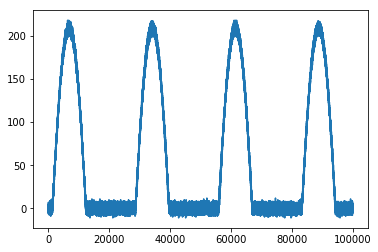

In [34]:
# This allows us to plot right here in the notebook
%matplotlib inline

# Hacking up a noisy pulse train
from matplotlib import pyplot as plt

n = 100000
noise = np.random.normal(size=n) * 3
pulses = np.maximum(np.sin(np.arange(n) / (n / 23)) - 0.3, 0.0)
waveform = ((pulses * 300) + noise).astype(np.int16)
plt.plot(waveform)

现在装饰此 `zero_suppress` 函数，使其在 CUDA 设备上作为向量化 ufunc 运行。如您遇到问题，请参阅 [此解决方案](../../../../edit/tasks/task1/task/solutions/zero_suppress_solution.py)。

In [35]:
@vectorize(['int16(int16, int16)'], target='cuda')
def zero_suppress(waveform_value, threshold):
    if waveform_value < threshold:
        result = 0
    else:
        result = waveform_value
    return result

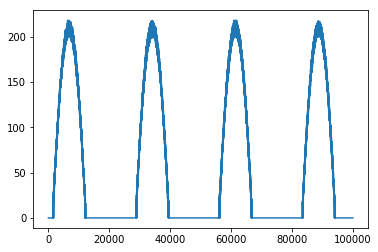

In [36]:
# This will throw an error until you successfully vectorize the `zero_suppress` function above.
# The noise on the baseline should disappear when zero_suppress is implemented
plt.plot(zero_suppress(waveform, 15))

## 管理 GPU 显存

目前，我们已将 CPU 上的 NumPy 数组用作 GPU 函数的输入和输出。为方便起见，Numba 已经自动将这些数据传输至 GPU，以便由 GPU 处理。通过这种隐式数据传输法，Numba 每次将数据传到 GPU 处理，并将处理后的数据再次传输至 CPU，过程非常耗时。

[CUDA 最佳实践指南](https://docs.nvidia.com/cuda/cuda-c-best-practices-guide/index.html) 中指出：

> **高优先级**：尽量减少 CPU(Host) 和 GPU(Device) 间的数据传输，即便与 CPU 相比，在设备上运行某些核函数并未实现性能提升时，也需遵照此规则。

秉持这一点，我们应思考如何避免将数据自动传输回主机，以降低开销。我们同时要确保仅在准备就绪时，将数据及时复制回主机。

为此，我们需创建 **CUDA 设备数组**，并将其传递至 GPU 函数。设备数组经过处理后不会自动传输回主机，因此您可据需在设备上重复使用这些数组，并只在操作至最后一步时，再将全部或部分数组发送回主机。

为进行演示，我们再次创建加法 ufunc 示例：

In [37]:
@vectorize(['float32(float32, float32)'], target='cuda')
def add_ufunc(x, y):
    return x + y

In [38]:
n = 100000
x = np.arange(n).astype(np.float32)
y = 2 * x

In [39]:
%timeit add_ufunc(x, y)  # Baseline performance with host arrays

1.09 ms ± 1.39 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


在 `numba.cuda` 模块中，有类函数可以将主机数据复制到 GPU，然后返回 CUDA 设备数组。注意，下面我们会尝试打印设备数组的内容，但我们只能获取数组信息，而无法获取其实际所含内容。这是因为数据目前位于设备上，我们需将其传输回主机才能打印相应值（稍后我们会对此进行讲解）：

In [40]:
from numba import cuda

x_device = cuda.to_device(x)
y_device = cuda.to_device(y)

print(x_device)
print(x_device.shape)
print(x_device.dtype)

(100000,)
float32


与 NumPy 数组类似，设备数组也可传递至 CUDA 函数，但在复制时不会产生任何额外开销：

In [41]:
%timeit add_ufunc(x_device, y_device)

393 µs ± 192 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


由于 `x_device` 和 `y_device` 已存在于设备上，因此该基准测试会更快完成。

不过，我们仍要为 ufunc 输出分配设备数组，然后将其复制回主机，但我们并未在以上单元中为变量分配数组。如要避免这一点，我们可以使用 [`numba.cuda.device_array()`](https://numba.pydata.org/numba-doc/dev/cuda-reference/memory.html#numba.cuda.device_array) 函数创建输出数组：

In [42]:
out_device = cuda.device_array(shape=(n,), dtype=np.float32)  # does not initialize the contents, like np.empty()

然后，我们可以在 ufunc 中使用特殊的 `out` 关键词参数，以指定输出缓存：

In [43]:
%timeit add_ufunc(x_device, y_device, out=out_device)

225 µs ± 572 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


此次调用 `add_ufunc` 并不需要在主机和设备之间进行任何数据传输，因而运行速度最快。如要将设备数组传输回主机内存，我们可以使用 `copy_to_host()` 方法：

In [ ]:
out_host = out_device.copy_to_host()
print(out_host[:10])

您可能会认为，此处比较的对象类型并不相同，因为在使用设备数组时，我们并未对 `to_device` 调用执行基准测试；但在使用主机数组 `a` 和 `b` 时，隐式数据传输会被纳入基准测试。事实的确如此。当然，正如之前所述，`add_func` 函数并非特别适用于 GPU。以上示例只是为说明如何消除传输需求。

如要确定是否应向 GPU 传输数据，请务必对您的数据传输执行基准测试。

此外，Numba 还提供其他方法来管理设备内存和数据传输，详情请参阅 [此文档](https://numba.pydata.org/numba-doc/dev/cuda/memory.html)。

### 练习：优化内存传输

给定以下 ufunc：

In [44]:
import math

@vectorize(['float32(float32, float32, float32)'], target='cuda')
def make_pulses(i, period, amplitude):
    return max(math.sin(i / period) - 0.3, 0.0) * amplitude

n = 100000
noise = (np.random.normal(size=n) * 3).astype(np.float32)
t = np.arange(n, dtype=np.float32)
period = n / 23

如下方单元所示，在调用 `make_pulses` 和 `add_ufunc` 期间，将数据传回主机并再次传回设备是一场无谓的数据往返之旅。

更新下方单元以使用设备分配功能，确保在调用 `make_pulses` 前仅会在设备中复制一次数据，且在调用 `add_ufunc` 后亦仅需在主机中复制一次。如您遇到问题，请参阅 [此解决方案](../../../../edit/tasks/task1/task/solutions/make_pulses_solution.py)。

In [45]:
# pulses = make_pulses(t, period, 100.0)
# waveform = add_ufunc(pulses, noise)

d_noise = cuda.to_device(noise)
d_t = cuda.to_device(t)
d_pulses = cuda.device_array(shape=(n,), dtype=np.float32)

make_pulses(d_t, period, 100.0, out=d_pulses)
waveform = add_ufunc(d_pulses, d_noise)

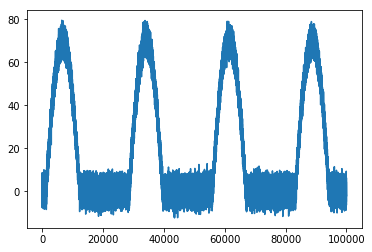

In [46]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(waveform)

## 评估

下面的练习将用到您目前所学的全部知识。不同于之前的练习，本次练习不提供任何解决方案代码，且您还需采取一些其他步骤来“运行评估”，以完成任务。**请仔细阅读说明后再开始工作，确保以最大机率成功完成本次评估。**

### 如何运行评估

请执行以下步骤完成评估：

1. 按照以下说明，像平常练习一样运行下方单元。
2. 若您对自己的执行效果甚感满意，请按照下方说明，将代码复制粘贴到所关联的源代码文件中。代码粘贴完成后，务必保存文件。
3. 返回至您用来启动此笔记本的浏览器选项卡，然后点击**“Assess”（评估）**按钮。几秒后会生成分数，同时还将提供一条实用信息。

点击**“Assess”（评估）**按钮的次数不限。如果您首次未通过，也不必担心，只需对代码作出其他修改并重复以上三个步骤，即可再次进行评估。祝您好运！

### 加速神经网络计算

下例简单演示了在神经网络中创建隐藏层所需执行的部分工作。该示例对一百万个灰度值（此处随机创建）执行归一化，为其赋予权重，然后应用激活函数对其作出处理。

您要完成的任务是：运用所学技巧将此工作移至 GPU，确保正确执行计算，并提升函数调用性能。就性能而言，`timeit` 命令当前报告的运行时间约为 *50 毫秒*，而您需要将此时间降至 *5 毫秒*。

开始任务之前，请注意以下事项：

* 仅向设备发送一次值，并将其保留在设备上以用于多次运算。相较于每次函数调用都在主机和设备之间来回传送数据，此举将能显著提升性能。本课程中，您已经学习如何将设备数组用作输出，以及如何消除 GPU 和主机间的数据往返，进而在 GPU 上重新使用数组。
* `np` 数学函数无法在设备上使用，您需改用与其作用相同的 `math` 函数。

In [63]:
# Do not modify this cell, these are the values that you will be assessed against.
n = 1000000

greyscales = np.floor(np.random.uniform(0, 255, n).astype(np.float32))
weights = np.random.normal(.5, .1, n).astype(np.float32)

以下单元用于导入数据集，及定义数据结构和函数。在作出任何修改后，请将此单元的内容粘贴至 [**`assessment/definitions.py`**](../../../../edit/tasks/task1/task/assessment/definitions.py) 并保存，之后再运行评估。

In [64]:
# Remember that we can't use numpy math function on the GPU...
# from numpy import exp
import math

# Consider modifying the 3 values in this cell to optimize host <-> device memory movement
normalized = np.empty_like(greyscales)
weighted = np.empty_like(greyscales)
activated = np.empty_like(greyscales)

d_greyscales = cuda.to_device(greyscales)
d_weights = cuda.to_device(weights)

d_normalized = cuda.to_device(noise)
d_weighted = cuda.to_device(weighted)
d_activated = cuda.to_device(normalized)

# Modify these 3 function calls to run on the GPU
@vectorize(['float32(float32)'], target='cuda')
def normalize(grayscales):
    return grayscales / 255

@vectorize(['float32(float32, float32)'], target='cuda')
def weigh(values, weights):
    return values * weights
 
@vectorize(['float32(float32)'], target='cuda')
def activate(values):
#     return ( np.exp(values) - np.exp(-values) ) / ( np.exp(values) + np.exp(-values) )
    return ( math.exp(values) - math.exp(-values) ) / ( math.exp(values) + math.exp(-values) )

以下单元用于调用函数，及使用以上单元中的定义和数据。在未作出任何修改时，`timeit` 报告的运行时间约为 *50 毫秒*。您需要加速该过程，并要显式控制数据传输，以将调用 3 个函数的时间降至 *5 毫秒*。

在作出任何修改后，请将此单元的内容粘贴至 [**`assessment/calls.py`**](../../../../edit/tasks/task1/task/assessment/calls.py) 并保存，之后再运行评估。**重要须知：此项评估将检测名为 `SOLUTION` 的数组，所以无论您如何重构代码，都要确保将最终结果存储在以 `SOLUTION` 命名的数组中。**

In [65]:
%%timeit
# Feel free to modify the 3 function calls in this cell
do_n = cuda.device_array(shape=(n,), dtype=np.float32)
do_w = cuda.device_array(shape=(n,), dtype=np.float32)
do_a = cuda.device_array(shape=(n,), dtype=np.float32)

# normalized = normalize(greyscales)
# weighted = weigh(normalized, weights)
# SOLUTION = activate(weighted)

normalize(d_greyscales, out=do_n)
weigh(do_n, d_weights, out=do_w)
activate(do_w, out=do_a)
SOLUTION = do_a.copy_to_host()
print(SOLUTION)

[0.2272618  0.1063962  0.09175416 ... 0.23954922 0.1513629  0.39461696]
[0.2272618  0.1063962  0.09175416 ... 0.23954922 0.1513629  0.39461696]
[0.2272618  0.1063962  0.09175416 ... 0.23954922 0.1513629  0.39461696]
[0.2272618  0.1063962  0.09175416 ... 0.23954922 0.1513629  0.39461696]
[0.2272618  0.1063962  0.09175416 ... 0.23954922 0.1513629  0.39461696]
[0.2272618  0.1063962  0.09175416 ... 0.23954922 0.1513629  0.39461696]
[0.2272618  0.1063962  0.09175416 ... 0.23954922 0.1513629  0.39461696]
[0.2272618  0.1063962  0.09175416 ... 0.23954922 0.1513629  0.39461696]
2.75 ms ± 185 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


## 总结

您已完成本课程学习，现已能够：

- 使用 Numba 为 CPU 编译 Python 函数
- 了解 Numba 如何编译函数
- 使用 GPU 加速 NumPy ufunc
- 使用 GPU 加速手写向量化函数
- 优化 CPU 主机和 GPU 设备之间的内存传输

## 下载内容

如要下载此笔记本的内容，请执行以下单元，然后点击下方的下载链接。注意：由于笔记本中的部分文件路径链接是专为我们的平台量身设计，若您在本地 Jupyter 服务器上运行此笔记本，这些链接可能会遭到损坏。不过，您仍可通过 Jupyter 文件导航器导航至这些文件。

In [ ]:
!tar -zcvf section1.tar.gz .

[下载本节文件。](files/section1.tar.gz)

## 附录：广义 ufunc

ufunc 可针对数组输入广播标量函数，但若要针对高维数组广播低维数组函数，又该如何操作呢？此时我们便会用到名为*广义 ufunc* ("gufunc") 的函数，这为应用 ufunc 开拓了一片新天地。

广义 ufunc 相对来说更加复杂，因为此类函数在处理多个输入时，需要使用*签名*（请勿与 Numba 类型签名混淆）来显示索引排序。全面讲解 "gufunc" 签名已超出本教程大纲，但您可参阅以下文件以作深入了解：

* gufunc 之 NumPy 讲解文档： https://docs.scipy.org/doc/numpy/reference/c-api.generalized-ufuncs.html
* gufunc 之 Numba 讲解文档：http://numba.pydata.org/numba-doc/latest/user/vectorize.html#the-guvectorize-decorator
* CUDA gufunc 之 Numba 讲解文档：http://numba.pydata.org/numba-doc/latest/cuda/ufunc.html#generalized-cuda-ufuncs

下面我们就来编写自己的归一化函数。编写时需要提供数组输入，并需沿最后一个维度计算 L2 范数。广义 ufunc 会将输出数组用作最后一个参数，而非返回值。若输出为标量，则我们仍可获得一个数组，但该数组会比输入数组少一个维度。例如，在计算数组的行总和时，输入二维数组将会返回一维数组，而输入三维数组则会返回二维数组。

In [ ]:
from numba import guvectorize
import math

@guvectorize(['(float32[:], float32[:])'], # have to include the output array in the type signature
             '(i)->()',                 # map a 1D array to a scalar output
             target='cuda')
def l2_norm(vec, out):
    acc = 0.0
    for value in vec:
        acc += value**2
    out[0] = math.sqrt(acc)

如要测试这一点，我们需在单位圆中绘制一些点：

In [ ]:
angles = np.random.uniform(-np.pi, np.pi, 10)
coords = np.stack([np.cos(angles), np.sin(angles)], axis=1)
print(coords)

一如预期，L2 范数为 1.0，接近舍入误差：

In [ ]:
l2_norm(coords)

<a href="https://www.nvidia.com/dli"> <img src="images/DLI Header.png" alt="标题" style="width: 400px;"/> </a>